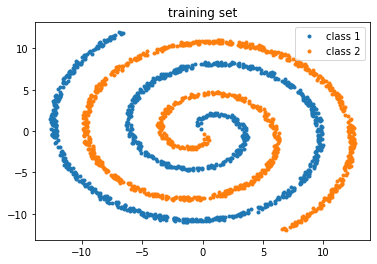

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X, y = twospirals(1000)

plt.title('training set')
plt.plot(X[y==0,0], X[y==0,1], '.', label='class 1')
plt.plot(X[y==1,0], X[y==1,1], '.', label='class 2')
plt.legend()
plt.show()

In [ ]:
mymlp = Sequential()
mymlp.add(Dense(12, input_dim=2, activation='tanh'))
mymlp.add(Dense(1, activation='sigmoid'))

mymlp.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# trains the model
mymlp.fit(X, y, epochs=150, batch_size=10,  verbose=0)

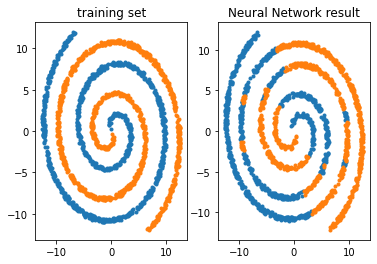

In [ ]:
X_test, y_test = twospirals(1000)

yy = np.round(mymlp.predict(X_test).T[0])

plt.subplot(1,2,1)
plt.title('training set')
plt.plot(X[y==0,0], X[y==0,1], '.')
plt.plot(X[y==1,0], X[y==1,1], '.')
plt.subplot(1,2,2)
plt.title('Neural Network result')
plt.plot(X_test[yy==0,0], X_test[yy==0,1], '.')
plt.plot(X_test[yy==1,0], X_test[yy==1,1], '.')
plt.show()

Se aumenta el numero de capas ocultas 

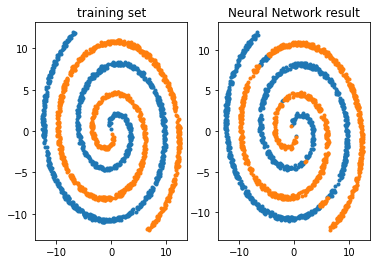

In [ ]:
mymlp = Sequential()
mymlp.add(Dense(12, input_dim=2, activation='tanh'))
mymlp.add(Dense(12, activation='tanh'))
mymlp.add(Dense(12, activation='tanh'))
mymlp.add(Dense(1, activation='sigmoid'))

mymlp.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Fit the model
history=mymlp.fit(X, y, epochs=150, batch_size=10,  verbose=0)

yy = np.round(mymlp.predict(X_test).T[0])

plt.subplot(1,2,1)
plt.title('training set')
plt.plot(X[y==0,0], X[y==0,1], '.')
plt.plot(X[y==1,0], X[y==1,1], '.')
plt.subplot(1,2,2)
plt.title('Neural Network result')
plt.plot(X_test[yy==0,0], X_test[yy==0,1], '.')
plt.plot(X_test[yy==1,0], X_test[yy==1,1], '.')
plt.show()

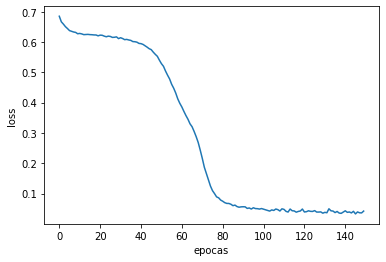

In [ ]:
from matplotlib import pyplot
import numpy as np

pyplot.plot(history.history['loss'], label='train')
pyplot.xlabel('epocas')
pyplot.ylabel('loss')
pyplot.show()